# Linear Regression

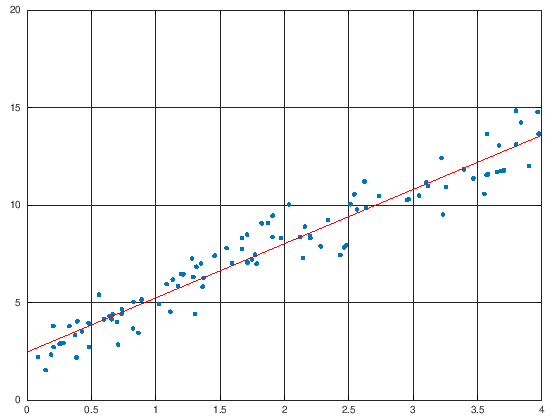

In [1]:
rand('seed', 1);
randn('seed', 1);

X = 4 * rand(100, 1);
Y = 2 + 3 * X + randn(100, 1);

_X = [ones(size(X, 1), 1), X];

Theta = pinv(_X' * _X) * _X' * Y;

A = Theta' * [1;0];
B = Theta' * [1;4];

plot(X, Y, '.', 'markersize', 10);
plot(X, Y, '.', 'markersize', 10, [0, 4], [A, B], 'r-');
grid on

## Geradengleichung

\begin{align}
f(x) = m \cdot x + n
\end{align}


\begin{align}
h_\theta(x) = \theta_0 + \theta_1 \cdot x 
\end{align}

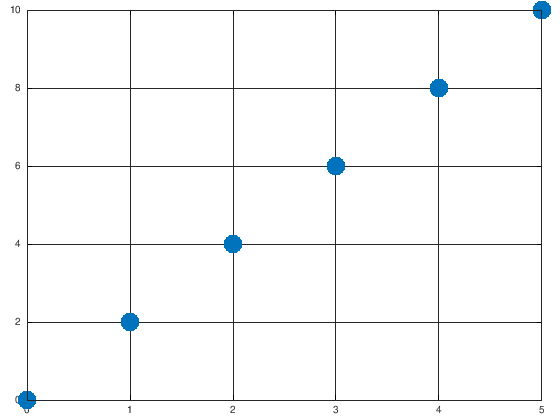

In [15]:
X = [0; 1; 2; 3; 4; 5];
Y = [0; 2; 4; 6; 8; 10];

plot(X, Y, '.', 'markersize', 50);
grid on

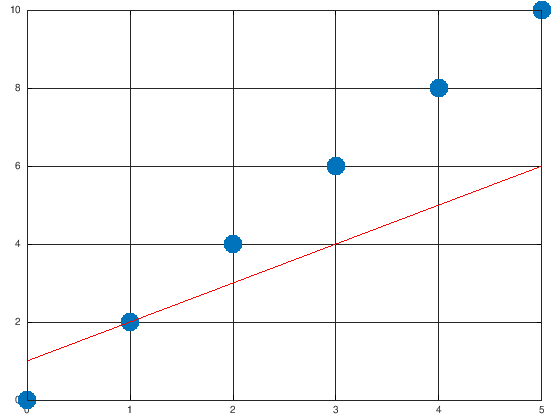

In [16]:
h_2 = 1 + 1 * X;

plot(X, Y, '.', 'markersize', 50, X, h_2, 'r-');
grid on

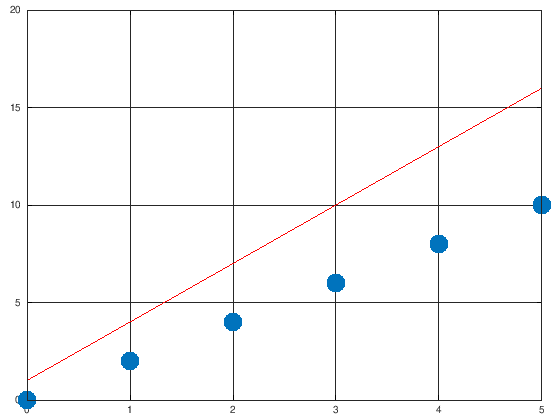

In [17]:
h_1 = 1 + 3 * X;

plot(X, Y, '.', 'markersize', 50, X, h_1, 'r-');
grid on

## Kostenfunktion

\begin{align}
J(\theta_0, \theta_1) = \frac{1}{2m} \displaystyle\sum_{i=1}^{m}(h_\theta(x_i) - y_i)^2
\end{align}

\begin{align}
h_\theta(x) = \theta_0 + \theta_1 \cdot x 
\end{align}

In [18]:
m = size(X, 1);

_X = [ones(size(X, 1), 1), X];

theta_0 = 1;
theta_1 = 3;

theta = [theta_0; theta_1];

In [19]:
sigma = 0;

for i = 1:m
    sigma = sigma + ((theta_0 + theta_1 * X(i)) - Y(i))^2;
end

(1/(2*m)) * sigma

ans =  7.5833


In [20]:
(1/(2*m)) * sum((_X * theta - Y) .^ 2)

ans =  7.5833


### Kostenfunktion mit Theta 0 = 0 und Theta 1 von -2 bis 6 

J =

 Columns 1 through 7:

   73.33333   41.25000   18.33333    4.58333    0.00000    4.58333   18.33333

 Columns 8 and 9:

   41.25000   73.33333



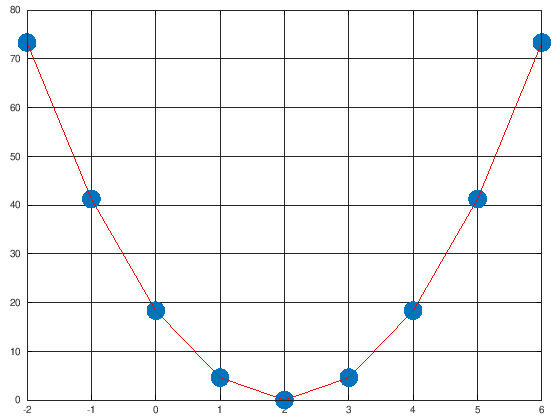

In [33]:
J = [];
A = [-2:1:6];

for i = 1:size(A,2);
    J = [J, (1/(2*m)) * sum((_X * [0; A(i)] - Y) .^ 2)];
end

J

plot(A, J, '.', 'markersize', 50, A, J, 'r-');
grid on

### Gradientenverfahren (Gradient descent)

Mit der ersten Ableitung der Kostenfunktion die Steigung für den jeweiligen Fehler herausfinden.

\begin{align}
J(\theta_0, \theta_1) = \frac{1}{2m} \displaystyle\sum_{i=1}^{m}(h_\theta(x_i) - y_i)^2
\end{align}

\begin{align}
\frac{\partial}{\partial \theta_0} = \frac{1}{m} \displaystyle\sum_{i=1}^{m}(h_\theta(x_i) - y_i)
\end{align}

\begin{align}
\frac{\partial}{\partial \theta_1} = \frac{1}{m} \displaystyle\sum_{i=1}^{m}((h_\theta(x_i) - y_i) \cdot x_i)
\end{align}

In [50]:
a = (1/m) * (_X' * (_X * [0;0] - Y))
b = (1/m) * (_X' * (_X * [0;4] - Y))

a * -1
b * -1

a * -0.01
b * -0.01

a =

   -5.0000
  -18.3333

b =

    5.0000
   18.3333

ans =

    5.0000
   18.3333

ans =

   -5.0000
  -18.3333

ans =

   0.050000
   0.183333

ans =

  -0.050000
  -0.183333



In [46]:
alpha = 0.005

thetas = randn(2, 1);

for i = 1:5000
    gradients = (1/m) * _X' * (_X * thetas - Y);
    thetas = thetas - alpha * gradients;
end

thetas

alpha =  0.0050000
thetas =

  -7.7421e-05
   2.0000e+00



In [47]:
h = _X * thetas;

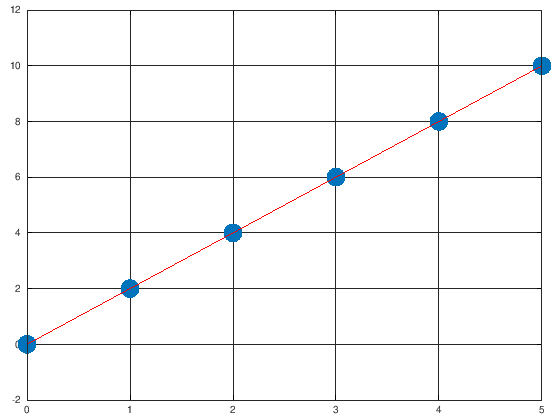

In [48]:
plot(X, Y, '.', 'markersize', 50, X, h, 'r-');
grid on